In [44]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [45]:
class Classifier:
    def __init__(self):
        self.correct = 0
        self.wrong=0
        self.total = 0
    def accuracy(self):
        return ((self.correct/self.total)*100)
ClassifierAccuracy = [Classifier() for i in range(10)]

In [46]:
data=pd.read_csv("train.csv").values
X=data[:,1:]
y=data[:,0]

Training and Learning the handwirtten digits

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [48]:
clf=DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)


Test on a random digit in the dataset

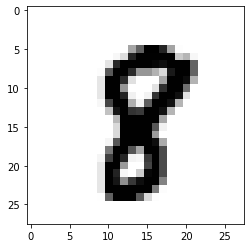

Our Prediction for this number is: [8]


In [49]:
import random 
r=random.randint(1,len(X_test))
d=X_test[r]
d.shape=(28,28)
pt.imshow(255-d,cmap='gray')
pt.show()
print("Our Prediction for this number is:", clf.predict([X_test[r]]))

In [50]:
y_pred = clf.predict(X_test)
correct_pred=0
for i in range(0,len(X_test)):
    if (y_pred[i]==y_test[i]):
        correct_pred+=1 
        ClassifierAccuracy[y_test[i]].correct+=1
        ClassifierAccuracy[y_test[i]].total+=1
    else: 
        ClassifierAccuracy[y_test[i]].wrong+=1
        ClassifierAccuracy[y_test[i]].total+=1

In [54]:
Accuracy=[]
digit=0
Accuracy.append(["HandWritten Digit","Total Tests","Accuracy of the Classifier"])
for classifier in ClassifierAccuracy:
    Accuracy.append([digit,classifier.total,round(classifier.accuracy(),2)])
    digit+=1

In [55]:
Accuracy.append(["All Digits",len(X_test),round((correct_pred/len(X_test))*100,2)])    
from IPython.display import HTML, display, Latex
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in Accuracy)
       )
))


HandWritten Digit,Total Tests,Accuracy of the Classifier
0,2101,90.91
1,2353,93.8
2,2081,80.49
3,2175,79.54
4,2006,82.6
5,1866,78.72
6,2095,87.06
7,2204,88.34
8,2047,78.31
9,2072,80.36


Text(0, 0.5, 'Accuracy of the Classsifier')

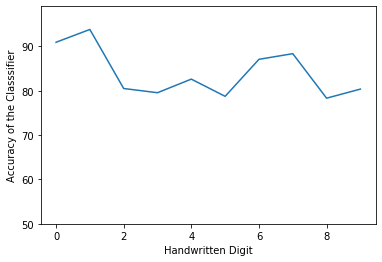

In [67]:
pt.plot(range(0,10), [classifier.accuracy() for classifier in ClassifierAccuracy])
pt.ylim((50,99))
pt.xlabel('Handwritten Digit')
pt.ylabel('Accuracy of the Classsifier')